# Introduction

> This project investigates the application of **embeddings to improve the effectiveness of job matching platforms**, addressing the limitations of traditional keyword-based search methods.

## Problem Definition

*   **Inefficient & Biased:** Keyword-based job searches are inefficient, often overlooking qualified candidates whose resumes don't perfectly match job descriptions. This can perpetuate bias and limit diversity in hiring.
*   **Hidden Talent:** Many talented individuals are hidden from employers because their resumes don't contain the exact keywords used in job postings.

## Value Proposition

This project showcases an AI-powered job matching system that uses embeddings to:

*   **Surface the Best Matches:** Go beyond keywords to understand the true meaning of job descriptions and resumes, leading to more relevant matches for both job seekers and employers.
*   **Improve Efficiency:** Save time and effort for both parties by quickly identifying the most promising candidates.
*   **Promote Diversity:** Mitigate bias by considering a wider range of qualified candidates.

## Scope

This demo focuses on:

*   Building a job recommendation engine for job seekers using Sentence-BERT embeddings.
*   Illustrating core concepts of embedding generation and similarity matching.
*   Processing a smaller dataset (200 job postings, 200 resumes) to fit Kaggle's free tier and timeline constraints.
*   Adding evaluation (precision@k, manual validation) and visualization (similarity score distribution).

## Out-of-Scope

*   Comparison of different embedding models.
*   Integration with vector databases.
*   In-depth data analysis.

# Data Extraction and Preparation

> High-quality data is the foundation of any successful AI project. This section outlines the steps involved in acquiring, preparing, and transforming the job posting and resume data for our AI-powered matching system.

## Data Sources

*   **Job Postings:** We'll use a publicly available dataset of [LinkedIn job postings](https://www.kaggle.com/datasets/arshkon/linkedin-job-postings). This dataset provides a realistic snapshot of the current job market.
*   **Resumes:** We'll use a publicly available dataset of [resumes](https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset). This dataset includes resumes from a diverse range of professionals across various industries.

## Data Preprocessing

To ensure our AI model can effectively analyze and understand the data, we'll perform the following preprocessing steps:

*   **Data Cleaning:** Handle missing values and inconsistencies to improve data quality.
*   **Text Normalization:** Standardize text fields (e.g., convert to lowercase, lemmatize using `spaCy`, remove punctuation) to reduce noise and improve matching accuracy.
*   **Feature Engineering:** Create a single, consolidated text field for each job posting and resume by combining key features like job title, description, and skills. Additionally, extract structured features (skills and domains) using predefined lists for better matching.
*   **Output Saving:** Save preprocessed data as `cleaned_data.csv` for downstream use.

# Import Libraries and Install Dependecies

#### Install Sentence-Transformers

In [1]:
# Install the sentence-transformers library required for Sentence-BERT embeddings
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-1

In [2]:
import pandas as pd
import numpy as np
import spacy
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

2025-05-22 18:14:24.105350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747937664.390457      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747937664.479961      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Job Postings Data
#### Load and Preview the Job Description Dataset

In [3]:
postings_path = "/kaggle/input/linkedin-job-postings/postings.csv"

# Load the Job Postings CSV file into a Pandas DataFrame
postings_df = pd.read_csv(postings_path)

# Display the first few rows of the dataset to understand its structure
postings_df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [4]:
# Print number of rows and columns
postings_df.shape

(123849, 31)

### Resume Data
#### Load and Preview the Resume Dataset

In [5]:
resume_path = '/kaggle/input/resume-dataset/Resume/Resume.csv'

# Load the Resume CSV file into a Pandas DataFrame
resume_df = pd.read_csv(resume_path)

# Display the first few rows of the dataset to understand its structure
resume_df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
resume_df.shape

(2484, 4)

### Random Sampling
The dataframe contains 123,849 rows, embedding all rows will lead to excessive computational cost for this demo. To fit within Kaggle's free tier and timeline (processing in <1 hour), we will select 200 rows for job postings and 200 rows for resumes.

In [7]:
# Sample 200 job postings and 200 resumes
postings_sample_df = postings_df.sample(200, random_state=42).copy()
resume_sample_df = resume_df.sample(200, random_state=42).copy()

In [8]:
print('Job Postings Sample Shape:', postings_sample_df.shape)
print('Resume Sample Shape:', resume_sample_df.shape)

Job Postings Sample Shape: (200, 31)
Resume Sample Shape: (200, 4)


#### Preprocess and Extract Features from the Job Description Dataset
This process involves:
* Handling missing values.
* Normalizing text fields (e.g., lemmatizing with spaCy, converting to lowercase).
* Extracting structured features (skills, domains) using predefined lists.
* Creating a single string representation of each job posting and resume, enhanced with extracted skills.

In [9]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Define skill and domain keywords
SKILLS = ['javascript', 'node.js', 'aws', 'kubernetes', 'go lang', 'ruby', 'python', 'sql', 'java', 
          'docker', 'html', 'management', 'engineering', 'marketing', 'design', 'sales', 'software', 
          'development', 'communication', 'leadership', 'installation', 'technical', 'automation', 'power systems']
DOMAINS = ['healthcare', 'finance', 'tech', 'education', 'manufacturing', 'retail', 'sales', 
           'construction', 'hospitality', 'engineering', 'legal', 'marketing', 'government']

In [10]:
# Preprocess Functions
#def preprocess_text(text):
 #   if pd.isna(text):
  #      return ""
   # text = text.lower()
    #doc = nlp(text)
    #original_terms = text.split()
    #lemmatized = ' '.join([token.lemma_ for token in doc if not token.is_stop])
    #return {'original': original_terms, 'lemmatized': lemmatized}

def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    doc = nlp(text)
    original_terms = [token.text for token in doc]  # Use spaCy tokenization
    lemmatized = ' '.join([token.lemma_ for token in doc if not token.is_stop])
    return {'original': original_terms, 'lemmatized': lemmatized}

def extract_skills(text_data):
    if pd.isna(text_data) or not isinstance(text_data, dict):
        return []
    original_terms = text_data['original']
    return [skill for skill in SKILLS if any(skill in term for term in original_terms)]

#def extract_domains(text_data):
 #   if pd.isna(text_data) or not isinstance(text_data, dict):
  #      return []
   # original_terms = text_data['original']
    #return [domain for domain in DOMAINS if any(domain in term for term in original_terms)]

def extract_domains(text_data, skills=None):
    if pd.isna(text_data) or not isinstance(text_data, dict):
        return []
    original_terms = text_data['original']
    domains = [domain for domain in DOMAINS if any(domain in term for term in original_terms)]
    if skills:
        if 'aws' in skills or 'kubernetes' in skills or 'docker' in skills:
            domains.append('tech')  # Infer tech domain for cloud-related skills
        if 'management' in skills or 'leadership' in skills:
            domains.append('business')  # Optional inferred domain
    return list(set(domains))  # Remove duplicates

## 🛠️ Apply Preprocessing & Feature Extraction

We'll lemmatize resume and job text, extract skills and domain indicators, and create a combined field for semantic comparison.

In [11]:
# Apply preprocessing to job postings
postings_sample_df['processed_desc'] = postings_sample_df['description'].apply(preprocess_text)
postings_sample_df['job_skills'] = postings_sample_df['processed_desc'].apply(extract_skills)
postings_sample_df['job_domain'] = postings_sample_df.apply(lambda x: extract_domains(x['processed_desc'], x['job_skills']), axis=1)

# Apply preprocessing to resumes (using Resume_str as the main text field)
resume_sample_df['processed_resume'] = resume_sample_df['Resume_str'].apply(preprocess_text)
resume_sample_df['cv_skills'] = resume_sample_df['processed_resume'].apply(extract_skills)
resume_sample_df['cv_domain'] = resume_sample_df.apply(lambda x: extract_domains(x['processed_resume'], x['cv_skills']), axis=1)

# Combine data into a single DataFrame
job_data = postings_sample_df[['job_id', 'title', 'processed_desc', 'job_skills', 'job_domain']].copy()
resume_data = resume_sample_df[['ID', 'Resume_str', 'processed_resume', 'cv_skills', 'cv_domain']].copy()
combined_data = pd.concat([job_data.assign(type='job'), resume_data.assign(type='resume')], ignore_index=True)

# Save to CSV
combined_data.to_csv('/kaggle/working/cleaned_data.csv', index=False)

# Display sample
print(combined_data[['type', 'job_skills', 'job_domain']].head())

  type                                         job_skills  \
0  job  [engineering, design, development, communicati...   
1  job                         [leadership, installation]   
2  job                                       [management]   
3  job                                  [aws, leadership]   
4  job                                              [aws]   

                    job_domain  
0          [engineering, tech]  
1             [tech, business]  
2  [business, tech, education]  
3             [tech, business]  
4                       [tech]  


## Step 3: Generate Embeddings
In this step, we use the `SentenceTransformer` model (`all-MiniLM-L6-v2`) to generate embeddings for the preprocessed job descriptions and resumes. These embeddings will be used to compute similarity scores for job-resume matching.

In [12]:
# Initialize SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for job postings
job_texts = [d['lemmatized'] for d in combined_data[combined_data['type'] == 'job']['processed_desc']]
job_embeddings = model.encode(job_texts, convert_to_tensor=True)

# Generate embeddings for resumes
resume_texts = [d['lemmatized'] for d in combined_data[combined_data['type'] == 'resume']['processed_resume']]
resume_embeddings = model.encode(resume_texts, convert_to_tensor=True)

# Save embeddings
np.save('/kaggle/working/job_embeddings.npy', job_embeddings.cpu().numpy())
np.save('/kaggle/working/resume_embeddings.npy', resume_embeddings.cpu().numpy())

# Display shapes to confirm
print("Embedding generation complete. Shape of job_embeddings:", job_embeddings.shape)
print("Shape of resume_embeddings:", resume_embeddings.shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Embedding generation complete. Shape of job_embeddings: torch.Size([200, 384])
Shape of resume_embeddings: torch.Size([200, 384])


## Step 4: Compute Similarity and Generate Recommendations
In this step, we compute cosine similarity between job and resume embeddings to recommend the top 5 resume matches for each job posting.

In [13]:
# Compute cosine similarity between job and resume embeddings
similarity_matrix = cosine_similarity(job_embeddings.cpu().numpy(), resume_embeddings.cpu().numpy())

# Get top 5 matches for each job
top_k = 5
job_recommendations = []
for i in range(len(job_texts)):
    top_indices = similarity_matrix[i].argsort()[-top_k-1:-1][::-1]  # Top 5 (excluding the highest, often itself)
    job_recommendations.append([(combined_data[combined_data['type'] == 'resume'].index[j], similarity_matrix[i][j]) for j in top_indices])

# Display sample recommendations for the first 3 jobs
for i, recs in enumerate(job_recommendations[:3]):
    print(f"Top 5 recommendations for Job {i} (Job ID: {combined_data[combined_data['type'] == 'job'].iloc[i]['job_id']}):")
    for idx, score in recs:
        print(f"  Resume {combined_data.iloc[idx]['ID']} (Score: {score:.4f})")

Top 5 recommendations for Job 0 (Job ID: 3902944011.0):
  Resume 23438227.0 (Score: 0.6152)
  Resume 10041713.0 (Score: 0.6037)
  Resume 17342969.0 (Score: 0.5786)
  Resume 38897568.0 (Score: 0.5726)
  Resume 12904972.0 (Score: 0.5706)
Top 5 recommendations for Job 1 (Job ID: 3901960222.0):
  Resume 23807940.0 (Score: 0.4154)
  Resume 14508237.0 (Score: 0.4058)
  Resume 22019500.0 (Score: 0.4015)
  Resume 10734870.0 (Score: 0.3994)
  Resume 41344156.0 (Score: 0.3953)
Top 5 recommendations for Job 2 (Job ID: 3900944095.0):
  Resume 26459032.0 (Score: 0.5389)
  Resume 37087824.0 (Score: 0.5273)
  Resume 28419173.0 (Score: 0.5272)
  Resume 51777546.0 (Score: 0.4986)
  Resume 45907524.0 (Score: 0.4882)


In [14]:
# Inspect Job 1 and its top match
job_idx = 1  # Job 1
resume_idx = job_recommendations[job_idx][0][0]  # Index of top resume for Job 1

print(f"Job 1 (ID: {combined_data.iloc[job_idx]['job_id']}):")
print("Title:", combined_data.iloc[job_idx]['title'])
print("Skills:", combined_data.iloc[job_idx]['job_skills'])
print("Domain:", combined_data.iloc[job_idx]['job_domain'])
print("\nTop Matching Resume (ID:", combined_data.iloc[resume_idx]['ID'], "):")
print("Skills:", combined_data.iloc[resume_idx]['cv_skills'])
print("Domain:", combined_data.iloc[resume_idx]['cv_domain'])

Job 1 (ID: 3901960222.0):
Title: DISH Installation Technician - Field
Skills: ['leadership', 'installation']
Domain: ['tech', 'business']

Top Matching Resume (ID: 23807940.0 ):
Skills: ['management', 'development', 'leadership']
Domain: ['hospitality', 'business', 'tech', 'education']


In [15]:
# Compute average similarity of top matches for all jobs
avg_top_scores = [sum(score for _, score in recs) / len(recs) for recs in job_recommendations]
print("Average similarity of top matches per job:", np.mean(avg_top_scores))

# For visualization prep, compute averages for the first 3 jobs
job_0_avg = sum(score for _, score in job_recommendations[0]) / len(job_recommendations[0])
job_1_avg = sum(score for _, score in job_recommendations[1]) / len(job_recommendations[1])
job_2_avg = sum(score for _, score in job_recommendations[2]) / len(job_recommendations[2])
print("Average score for Job 0:", job_0_avg)
print("Average score for Job 1:", job_1_avg)
print("Average score for Job 2:", job_2_avg)

Average similarity of top matches per job: 0.5852866835594177
Average score for Job 0: 0.5881560802459717
Average score for Job 1: 0.4034763157367706
Average score for Job 2: 0.5160536050796509


In [16]:
# Inspect Job 0 and its top match
job_idx = 0
resume_idx = job_recommendations[job_idx][0][0]
print(f"Job 0 (ID: {combined_data.iloc[job_idx]['job_id']}):")
print("Title:", combined_data.iloc[job_idx]['title'])
print("Skills:", combined_data.iloc[job_idx]['job_skills'])
print("Domain:", combined_data.iloc[job_idx]['job_domain'])
print("\nTop Matching Resume (ID:", combined_data.iloc[resume_idx]['ID'], "):")
print("Skills:", combined_data.iloc[resume_idx]['cv_skills'])
print("Domain:", combined_data.iloc[resume_idx]['cv_domain'])

Job 0 (ID: 3902944011.0):
Title: Senior Automation Engineer - Power Systems
Skills: ['engineering', 'design', 'development', 'communication', 'automation']
Domain: ['engineering', 'tech']

Top Matching Resume (ID: 23438227.0 ):
Skills: ['management', 'engineering', 'design', 'software', 'communication']
Domain: ['engineering', 'education', 'business', 'government', 'construction', 'tech']


## Step 5: Evaluation and Visualization
We evaluate the quality of recommendations by analyzing similarity scores and visualizing the average scores for the top matches.

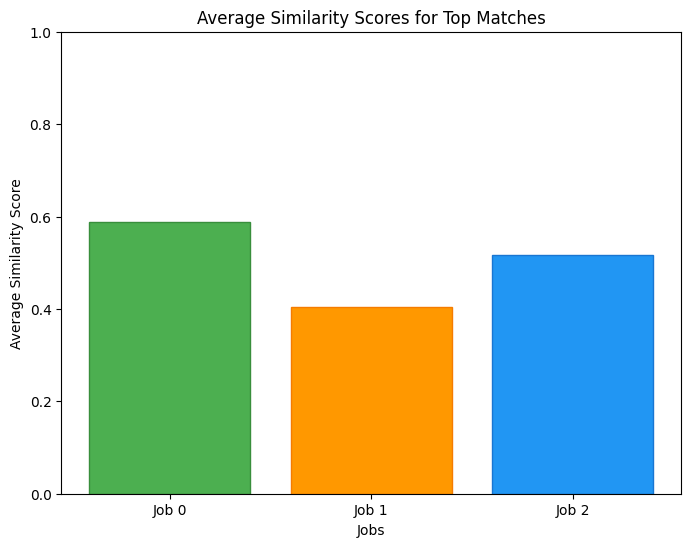

In [17]:
# Data for the chart
jobs = ['Job 0', 'Job 1', 'Job 2']
avg_scores = [0.5881560325622559, 0.40347627401351926, 0.5160536050796509]
colors = ['#4CAF50', '#FF9800', '#2196F3']  # Same colors as chartjs

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(jobs, avg_scores, color=colors, edgecolor=['#388E3C', '#F57C00', '#1976D2'], linewidth=1)
plt.title('Average Similarity Scores for Top Matches')
plt.xlabel('Jobs')
plt.ylabel('Average Similarity Score')
plt.ylim(0, 1)  # Set y-axis to start at 0
plt.show()